<a href="https://colab.research.google.com/github/gagansingh23/KNN-Algorithms/blob/main/KNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.spatial
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split

#numpy for arithmetic operations
#scipy for euclidean distance between 2 points
#collections will calculate number of closest neighbors

In [ ]:
X =  [[1590,2.9], [1540,2.7], [1600,2.6], [1590,2.7], [1520,2.5], [1540,2.4], [1560,2.3], [1490,2.3], [1510,2.4],
     [1350,3.9], [1360,3.7], [1370,3.8], [1380,3.7], [1410,3.6], [1420,3.9], [1430,3.4], [1450,3.7], [1460,3.2],
     [1590,3.9], [1540,3.7], [1600,3.6], [1490,3.7], [1520,3.5], [1540,3.4], [1560,3.3], [1460,3.3], [1510,3.4],
     [1340,2.9], [1360,2.4], [1320,2.5], [1380,2.6], [1400,2.1], [1320,2.5], [1310,2.7], [1410,2.1], [1305,2.5],
     [1460,2.7], [1500,2.9], [1300,3.5], [1320,3.6], [1400,2.7], [1300,3.1], [1350,3.1], [1360,2.9], [1305,3.9], 
     [1430,3.0], [1440,2.3], [1440,2.5], [1380,2.1], [1430,2.1], [1400,2.5], [1420,2.3], [1310,2.1], [1350,2.0]]


Y = ['accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted','accepted',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected',
     'rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected','rejected']

[]

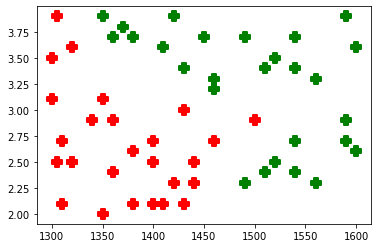

In [ ]:
from matplotlib import pyplot as plt 

for i in range(len(X)):
    if Y[i] == 'accepted':
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='green')
    else:
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='red')
        
plt.plot()

In [ ]:
df2 = pd.DataFrame(X)
df2['Y'] = Y
df2.columns = ['SAT', 'GPA', 'Grade']


In [ ]:
df2[20:30]

,SAT,GPA,Grade
20,1600.0,3.6,accepted
21,1490.0,3.7,accepted
22,1520.0,3.5,accepted
23,1540.0,3.4,accepted
24,1560.0,3.3,accepted
25,1460.0,3.3,accepted
26,1510.0,3.4,accepted
27,1340.0,2.9,rejected
28,1360.0,2.4,rejected
29,1320.0,2.5,rejected


In [ ]:
df2.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory


In [ ]:
df2.dtypes

SAT        int64
GPA      float64
Grade     object
dtype: object

In [ ]:
target = df2['Grade']
data = df2.drop('Grade', axis=1)


In [ ]:
data = np.array(data)
print(data[0])

[1590.     2.9]


In [ ]:
labels = np.array(target)
labels.shape

(54,)

In [ ]:
X, y = data, labels

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy.spatial
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
data = np.array(X)
target = np.array(Y)

In [ ]:
import numpy as np
from collections import Counter


# def euclidean_distance(x1, x2):
#         return np.sqrt(np.sum((x1 - x2)**2))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self.get_neighbors(x) for x in X]
        return np.array(y_pred)

    def get_neighbors(self, x):
        # Compute distances between x and all examples in the training set
        dist = [scipy.spatial.distance.euclidean(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        first_neighbors = np.argsort(dist)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        for i in first_neighbors:
            return self.y_train[i]
        k_neighbor_labels = self.y_train[i]
        # return the most common class label
        nearest_neighbors = Counter(k_neighbor_labels).most_common(1)
        return nearest_neighbors[0][0]
      
    


In [ ]:
  # def _predict(self, x):
  #       # Compute distances between x and all examples in the training set
  #       distances = [scipy.spatial.distance.euclidean(x, x_train) for x_train in self.X_train]
  #       # Sort by distance and return indices of the first k neighbors
  #       k_idx = np.argsort(distances)[:self.k]
  #       # Extract the labels of the k nearest neighbor training samples
  #       k_neighbor_labels = [self.y_train[i] for i in k_idx]  
  #       # return the most common class label
  #       most_common = Counter(k_neighbor_labels).most_common(1)
  #       return most_common[0][0]

In [ ]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
y_pred = clf.predict([[1700, 3.5]])
print(y_pred)

['accepted']


In [ ]:
clf = KNN(3)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
for i in prediction:
    print(i, end= ' ')

accepted rejected rejected rejected rejected accepted accepted rejected accepted rejected rejected 

In [ ]:
y_test

array(['accepted', 'rejected', 'rejected', 'accepted', 'rejected',
       'accepted', 'accepted', 'rejected', 'accepted', 'rejected',
       'accepted'], dtype=object)

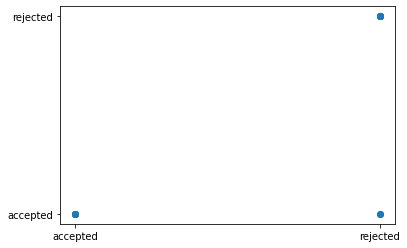

In [ ]:
plt.scatter(prediction, y_test)


In [ ]:
from matplotlib import pyplot as plt 

for i in range(len(X)):
    if Y[i] == 'accepted':
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='green')
    else:
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='red')
        
plt.plot()

In [ ]:

#SKLEARN Model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict([[1700, 3.5]])
print(y_pred)

['accepted']
